In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loading the Datasets
loading the sales data, order reviews, sellers data and geolocation

In [2]:
sales_data = pd.read_csv(r"C:\Users\Nikhi\OneDrive\Desktop\E-commerce\Data\cleaned\sales_data.csv")
order_reviews = pd.read_csv(r"C:\Users\Nikhi\OneDrive\Desktop\E-commerce\Data\cleaned\orders_reviews_data.csv")
sellers_data = pd.read_csv(r"C:\Users\Nikhi\OneDrive\Desktop\E-commerce\Data\cleaned\sellers_data.csv")
geolocation_data = pd.read_csv(r"C:\Users\Nikhi\OneDrive\Desktop\E-commerce\Data\cleaned\geolocation_data.csv")

In [3]:
sales_data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,141.46,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,3.0,179.12,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [4]:
sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,115011.0,35082.050795,29851.689633,1003.00,11310.00,24320.00,58803.00,99980.00
order_item_id,115011.0,1.196407,0.699425,1.00,1.00,1.00,1.00,21.00
price,115011.0,120.081819,183.043451,0.85,39.90,74.90,133.00,6735.00
freight_value,115011.0,19.996013,15.744668,0.00,13.08,16.28,21.18,409.68
payment_sequential,115011.0,1.090704,0.684430,1.00,1.00,1.00,1.00,26.00
payment_installments,115011.0,2.936989,2.772532,0.00,1.00,2.00,4.00,24.00
payment_value,115011.0,171.918390,266.133022,0.00,60.85,108.19,188.94,13664.08
product_name_lenght,113384.0,48.802485,10.017682,5.00,42.00,52.00,57.00,76.00
product_description_lenght,113384.0,785.800748,651.000002,4.00,346.00,601.00,985.00,3992.00
product_photos_qty,113384.0,2.209403,1.720284,1.00,1.00,1.00,3.00,20.00


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115011 entries, 0 to 115010
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115011 non-null  object 
 1   customer_id                    115011 non-null  object 
 2   order_status                   115011 non-null  object 
 3   order_purchase_timestamp       115011 non-null  object 
 4   order_approved_at              115011 non-null  object 
 5   order_delivered_carrier_date   115011 non-null  object 
 6   order_delivered_customer_date  115011 non-null  object 
 7   order_estimated_delivery_date  115011 non-null  object 
 8   customer_unique_id             115011 non-null  object 
 9   customer_zip_code_prefix       115011 non-null  int64  
 10  customer_city                  115011 non-null  object 
 11  customer_state                 115011 non-null  object 
 12  order_item_id                 

In [6]:
sales_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [7]:
# Converting date columns to datetime format
dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date']
for date in dates:
    sales_data[date] = pd.to_datetime(sales_data[date])

sales_data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    

In [8]:
sales_data["order_purchase_timestamp"].value_counts()

order_purchase_timestamp
2017-08-08 20:26:31    63
2017-09-23 14:56:45    38
2017-06-07 12:05:10    26
2018-05-12 12:28:58    24
2017-07-07 14:55:43    24
                       ..
2017-09-03 20:52:34     1
2018-07-22 16:58:38     1
2017-11-26 19:42:22     1
2018-04-01 16:13:26     1
2018-06-03 18:44:31     1
Name: count, Length: 95932, dtype: int64

In [9]:
# analysing monthly order trends
sales_data["order_month"] = sales_data["order_purchase_timestamp"].dt.to_period("M")
monthly_orders = sales_data["order_month"].value_counts().sort_index()

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_11268\4248095407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, palette="viridis")


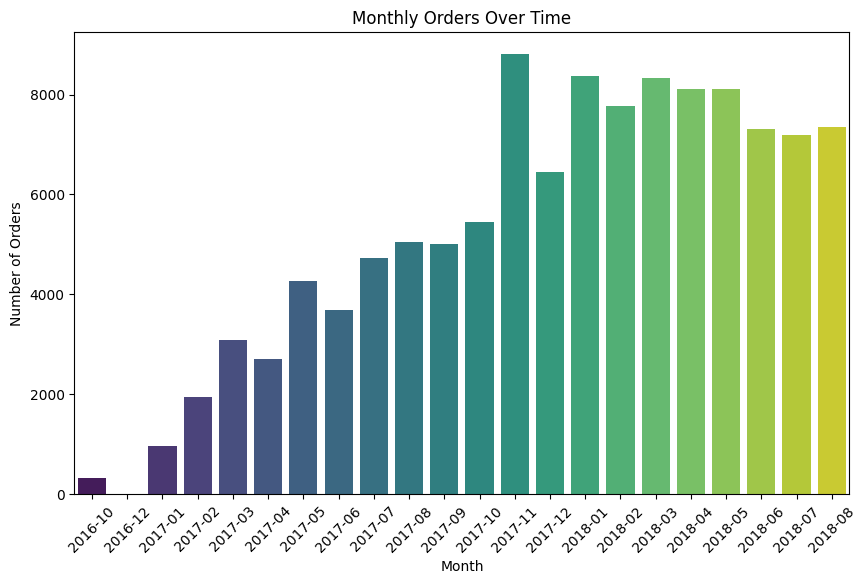

In [10]:
# Visualizing monthly order trends
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Monthly Orders Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

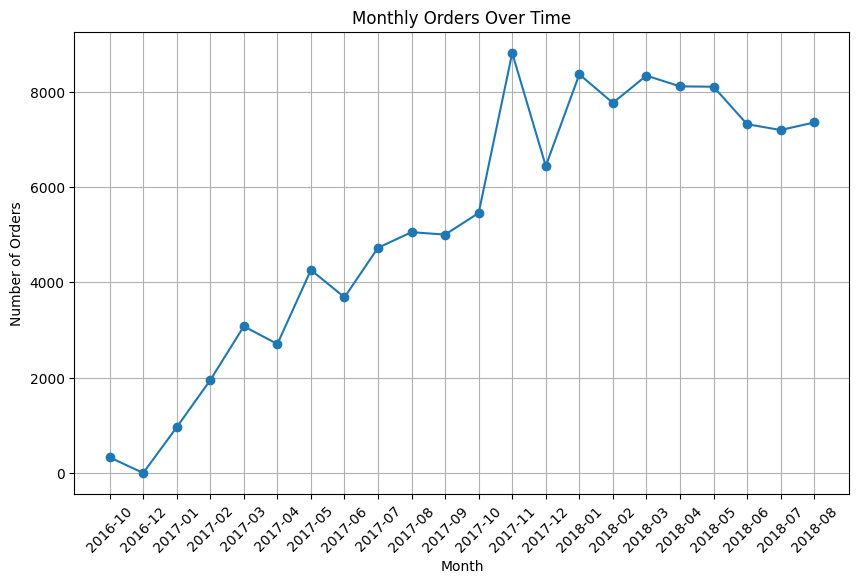

In [11]:
# Alternative line plot for monthly order trends
plt.figure(figsize=(10,6))
plt.plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Orders Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

The monthly order trend shows rapid growth from late 2016 to 2017, followed by a seasonal peak around Q4 2017. In 2018, order volume stabilizes at a high level, indicating business maturity and sustained customer demand.

In [12]:
# Analysing nmonthly sales trends
# Creating a 'revenue' column by summing 'price' and 'freight_value'
sales_data['revenue'] = sales_data['price'] + sales_data['freight_value']
# grouping by 'order_month' to calculate total revenue per month
monthly_revenue = sales_data.groupby('order_month')['revenue'].sum().reset_index()


In [13]:
monthly_revenue['order_month'] = monthly_revenue['order_month'].astype(str)
monthly_revenue.dtypes

order_month     object
revenue        float64
dtype: object

In [14]:
# top 10 months by revenue
monthly_revenue.sort_values('revenue', ascending=False).head(10)

,order_month,revenue
12,2017-11,1194738.89
17,2018-04,1171614.31
18,2018-05,1170957.30
16,2018-03,1168529.57
14,2018-01,1120930.48
20,2018-07,1063571.33
19,2018-06,1063469.99
21,2018-08,1020236.21
15,2018-02,1005497.71
13,2017-12,874067.75


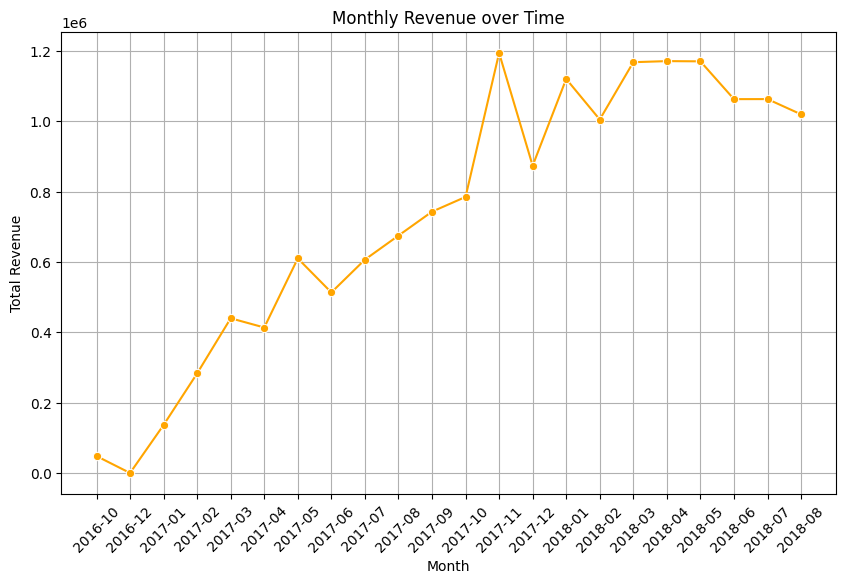

In [15]:
# visualizing monthly revenue trends in line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_revenue, x='order_month', y='revenue', marker='o', color='orange')
plt.xticks(rotation=45)
plt.title("Monthly Revenue over Time")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

Monthly revenue shows strong growth with noticeable seasonal peaks around late 2017 and early 2018, followed by stabilization, indicating a maturing marketplace
This indicates business growth and increasing customer adoption.

In [16]:
# product category analysis which category has highest revenue
category_revenue = sales_data.groupby('product_category_name_english')['revenue'].sum().reset_index()

In [17]:
# Top 10 product categories by revenue
top_categories = category_revenue.sort_values('revenue', ascending=False).head(10)
top_categories

,product_category_name_english,revenue
43,health_beauty,1456026.83
71,watches_gifts,1315013.93
7,bed_bath_table,1292422.04
65,sports_leisure,1159638.36
15,computers_accessories,1068666.04
39,furniture_decor,922629.26
49,housewares,798858.27
20,cool_stuff,719293.84
5,auto,696377.68
42,garden_tools,593677.82


C:\Users\Nikhi\AppData\Local\Temp\ipykernel_11268\2857473658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, y='product_category_name_english', x='revenue', palette='magma')


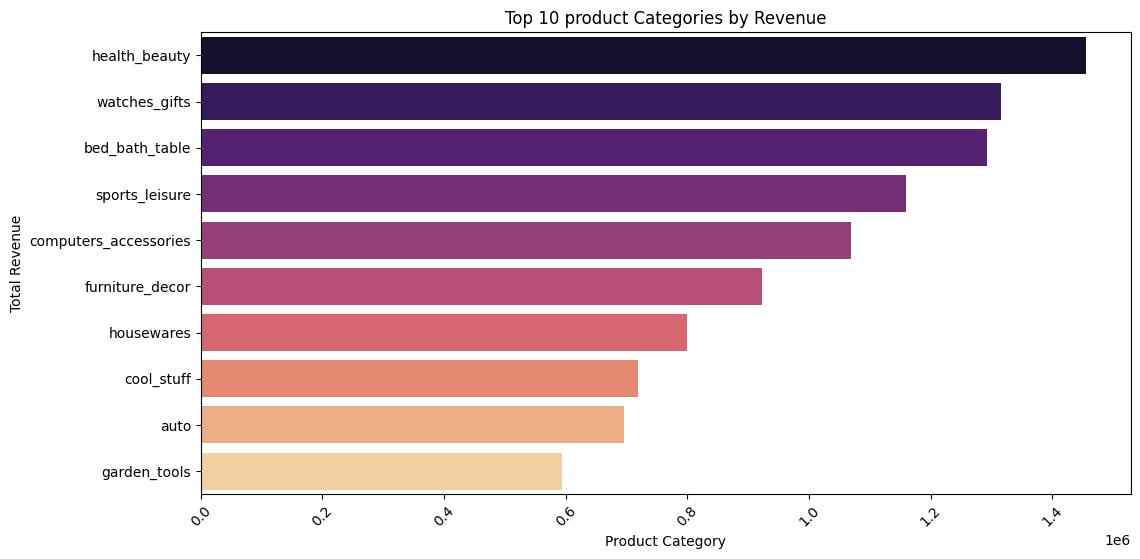

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_categories, y='product_category_name_english', x='revenue', palette='magma')
plt.xticks(rotation=45)
plt.title("Top 10 product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

Revenue is concentrated in lifestyle and daily-use categories like Health & Beauty and Home Essentials, while specialized categories contribute less but still add diversification

In [19]:
sales_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_month,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,2018-07,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,2018-08,179.12


customer retention rate

In [20]:
# count how many orders each customer has placed
customer_order = sales_data.groupby('customer_unique_id')['order_id'].nunique().reset_index(name= 'order_count')

In [21]:
# repeat customers analysis
repeat_customer = (customer_order['order_count'] > 1).mean() * 100
repeat_customer

np.float64(2.9999464295280442)

majority of customer are the one time buyers, indicating potential to improve retention strategies.
only 2.9 % are the repeated customer

does late delivery impact reviews score

In [22]:
# delivery time distribution analysis
# delivery time calculation 
sales_data['delivery_time'] = (sales_data['order_delivered_customer_date'] - sales_data['order_purchase_timestamp'])  
# converting delivery time to days
sales_data['delivery_time_days'] = sales_data['delivery_time'].dt.days

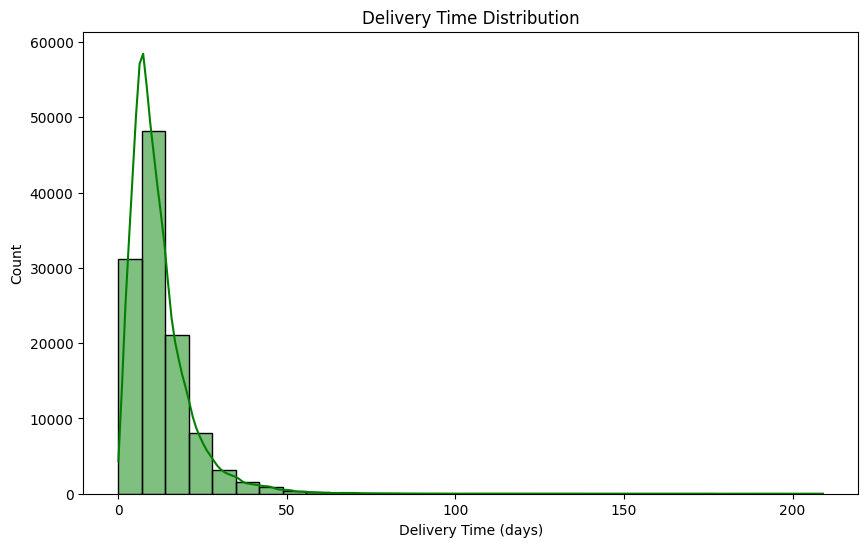

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(sales_data['delivery_time_days'], bins=30, kde=True, color='green')
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (days)")
plt.show()

Most deliveries occur within 7–15 days, but long-tail delays may negatively affect customer satisfaction.
some of the deliveries are delivered more than 100 days it affect customer satisfaction

In [24]:
# Delivery Delay vs review ratings analysis
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [25]:
sales_delivery = (sales_data[['order_id', 'delivery_time_days']].drop_duplicates(subset='order_id'))
print(sales_delivery.shape)
sales_delivery.head()

(96454, 2)


,order_id,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,8
3,53cdb2fc8bc7dce0b6741e2150273451,13
4,47770eb9100c2d0c44946d9cf07ec65d,9
5,949d5b44dbf5de918fe9c16f97b45f8a,13
6,ad21c59c0840e6cb83a9ceb5573f8159,2


In [26]:
order_reviews = order_reviews.merge(sales_delivery, on='order_id', how='left')

In [27]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,delivery_time_days
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59,6.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13,9.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24,13.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,10.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,18.0


In [28]:
order_reviews.isnull().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title          0
review_comment_message        0
review_creation_date          0
review_answer_timestamp       0
delivery_time_days         2887
dtype: int64

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_11268\2988559307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=order_reviews, x='review_score', y='delivery_time_days', palette='Set2')


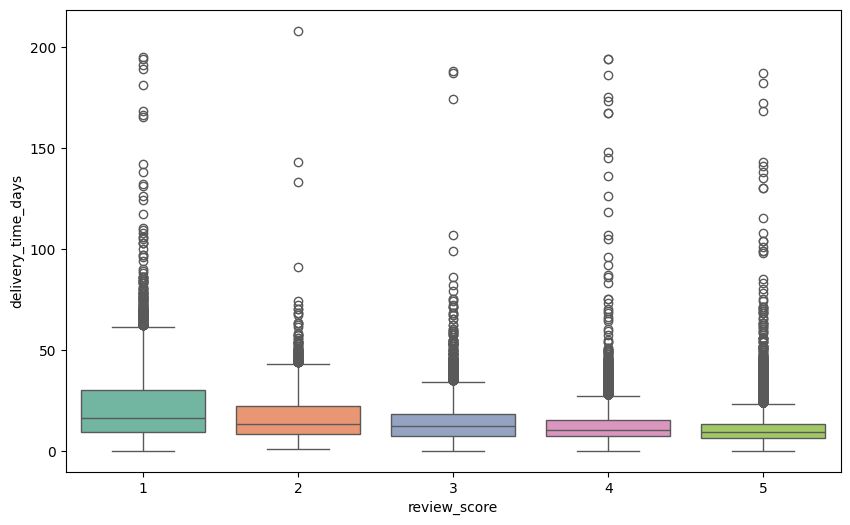

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=order_reviews, x='review_score', y='delivery_time_days', palette='Set2')
plt.show()

Delivery time has a strong inverse relationship with customer satisfaction — longer deliveries significantly increase low review scores.

### which state contain most to sales

In [30]:
sales_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_month,revenue,delivery_time,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71,8 days 10:28:40,8
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71,8 days 10:28:40,8
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71,8 days 10:28:40,8
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,perfumery,2018-07,141.46,13 days 18:46:08,13
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,auto,2018-08,179.12,9 days 09:27:40,9


In [31]:
#  
state_sales = (sales_data.groupby('customer_state')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False))

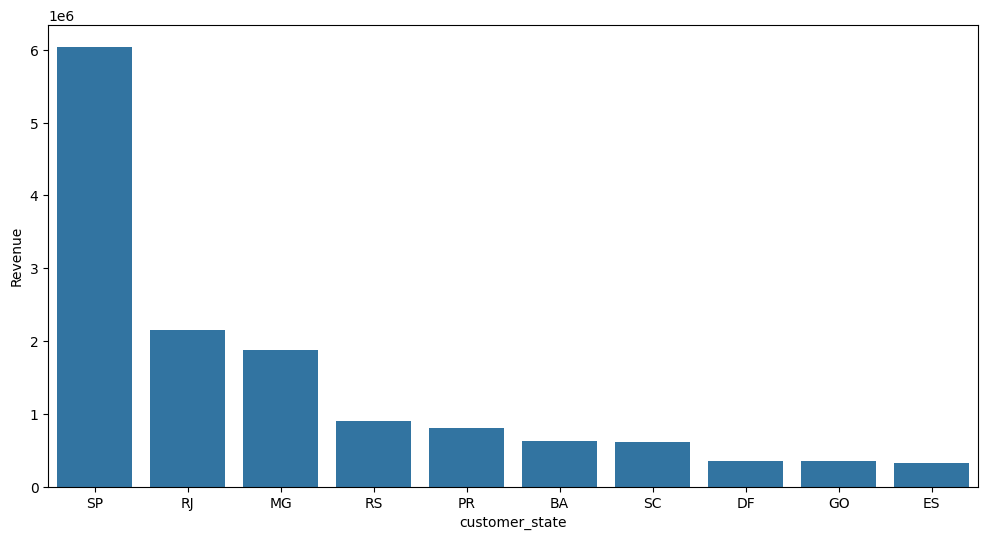

In [32]:

top_states = state_sales.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_states, x='customer_state', y='revenue')
plt.xlabel("customer_state")
plt.ylabel('Revenue')
plt.show()

São Paulo(SP) is the top-performing state in terms of revenue, contributing more than 40–45% of total sales. This indicates strong customer demand and seller concentration in the region.

## KPI

In [33]:
# Total number of customers
total_customers = sales_data['customer_id'].nunique()
total_revenue = sales_data['revenue'].sum()   # Total revenue generated
retention_rate = repeat_customer  # repeat customers who made more than one purchase
total_orders = sales_data['order_id'].nunique()  # Total number of orders
AOV = total_revenue/total_orders   # Average Order value
churn_rate = 100 - retention_rate  #percentage of customers who stop using a company's product over a specific period
print(f"Total Customers: {total_customers}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order value: {AOV:.2f}")
print(f"Repeat purchase Rate: {retention_rate:.2f}%")
print(f"Churn_rate: {churn_rate:.2f}%")

Total Customers: 96454
Total Revenue: $16,110,491.56
Total Orders: 96454
Average Order value: 167.03
Repeat purchase Rate: 3.00%
Churn_rate: 97.00%


In [35]:
sales_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_month,revenue,delivery_time,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71,8 days 10:28:40,8
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71,8 days 10:28:40,8
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,housewares,2017-10,38.71,8 days 10:28:40,8
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,perfumery,2018-07,141.46,13 days 18:46:08,13
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,auto,2018-08,179.12,9 days 09:27:40,9
